In [115]:
!pip install regex
!pip install pybind11

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 4.0 MB/s eta 0:00:00 0:00:01


In [2]:
%load_ext autoreload
%autoreload 2

import oddesa
import importlib
import numpy as np

In [9]:
oddesa.equation("x' = x - k*x|tau + x|1 + x'|1", 
                k=2, tau = np.linspace(1,2,1001))


equation(x' = x - k*x|tau + x|1 + x'|1) where (k = 2; tau = [1.    1.001 1.002 ... 1.998 1.999 2.   ])

In [7]:
oddesa.equation("x'' = x - k * x|tau + x|1.5 + x''|tau", 
                k=2, tau=1)

equation(x'' = x - k * x|tau + x|1.5 + x''|tau; x' = x') where (k = 2; tau = 1)

In [75]:
oddesa.cpp_errors("int x˛ = 0; int main() {return 0;}")

''

In [19]:
lorenz_eq = oddesa.equation("""
    x' = sigma*(y - x); 
    y' = rho*x - x*z;
    z' = -beta*z + x*z;
""", interval=[0,10], ic=[0., 0.1, 0.2])

lorenz_eq.compile()

params, solution = lorenz_eq.solution(sigma=np.linspace(0, 1, 1000), rho=28., beta=3/8)
t, x, y, z = solution[0]


            #include <pybind11/pybind11.h>
            #include <pybind11/stl.h>
            #include <pybind11/numpy.h>
            #include "equation.hpp"
            #include "utils/cartesian_product.hpp"
            #include <vector>
            #include <tuple>
            namespace py = pybind11;

            struct System : IVP<3, System> {
                double sigma;
                double rho;
                double beta;
            
            
                System(const tuple<double, double, double>& params) {
                    tie(sigma, rho, beta) = params;

                    lhs = [this](double t, const Vec<3>& XXX){
                        const auto& [x, y, z] = XXX;
                        return Vec<3>{
                            sigma*(y - x),
                            rho*x - x*z,
                            -beta*z + x*z
                        };
                    };

                    initial_condition = 
                        [this](double t)

In [11]:
params, solution = lorenz_eq.solution(1., 28., 3/8)
t, x, y, z = solution[0]

In [14]:
type(t)

list

In [3]:
import matplotlib.pyplot as plt

plt.plot(t, x)
plt.plot(t, y)
plt.plot(t, z)

NameError: name 't' is not defined

9204648218355122611

In [6]:
harmonic_osc = oddesa.equation("""
    x'' = - k * x
""", ic=[0., 0.1])

harmonic_osc.compile()


            #include <pybind11/pybind11.h>
            #include <pybind11/stl.h>
            #include <pybind11/numpy.h>
            #include "equation.hpp"
            #include "utils/cartesian_product.hpp"
            #include <vector>
            #include <tuple>
            namespace py = pybind11;

            struct System : IVP<2, System> {
                double k;
                        
                System(const tuple<double>& params) {
                    tie(k) = params;

                    lhs = [this](double t, const Vec<2>& XXX){
                        const auto& [x´, x] = XXX;
                        return Vec<2>{
                            - k * x,
                            x´
                        };
                    };

                    initial_condition = 
                        [this](double t){return Vec<2>{0.0, 0.1};};

                    integration_interval = make_pair(0, 10);
                }
                
                tuple<Event<

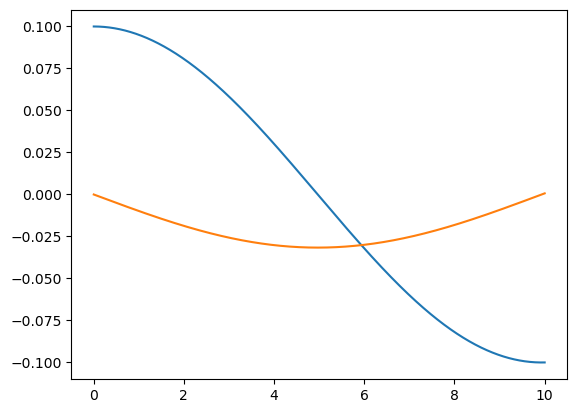

In [8]:
params, solution = harmonic_osc.solution(k = 0.1)
t, x_, x = solution[0]
import matplotlib.pyplot as plt

plt.plot(t, x)
plt.plot(t, x_)